# Comparison Analysis of the IEEE 13 Node Test Feeder

In [1]:
# Importing the necessary libraries and dependencies
from Utils.file_manage import *
from Utils.plot_utils import *
from IEEE13Nodes import *

In [2]:
# Defining the files

# Original Case
original_file_name = "..\\OpenDSS_Files\\Traditional_IEEE13Node\\IEEE13Nodeckt.dss"
path_original = get_file_path(original_file_name)

# Modified Case with complete data
modified_file_name = "..\\OpenDSS_Files\\4wire_IEEE13Node\\IEEE13Nodeckt_4wire.dss"
path_modified = get_file_path(modified_file_name)

The file path is:  C:\Users\anavr\Documents\IEEE13Node_NEV\OpenDSS_Files\Traditional_IEEE13Node\IEEE13Nodeckt.dss
The file path is:  C:\Users\anavr\Documents\IEEE13Node_NEV\OpenDSS_Files\4wire_IEEE13Node\IEEE13Nodeckt_4wire.dss


## 1. Original Case with 3ph

### 1.1. Switch Closed

In [3]:
original_3ph_closed = IEEE13Nodes(path_original)
original_3ph_closed.run_power_flow()
original_3ph_closed_losses = original_3ph_closed.get_losses()
print(f'The losses of the system original 3ph with the switch closed are: {original_3ph_closed_losses} [kW]')
original_3ph_closed_vpu = original_3ph_closed.get_mag_voltages_pu()
original_3ph_closed_vuf = original_3ph_closed.get_vuf_3ph()
original_3ph_closed_currents = original_3ph_closed.get_mag_currents()

The circuit has converged successfully!
The losses of the system original 3ph with the switch closed are: 112.40524721887374 [kW]


#### 1.1.1. Voltage Magnitude

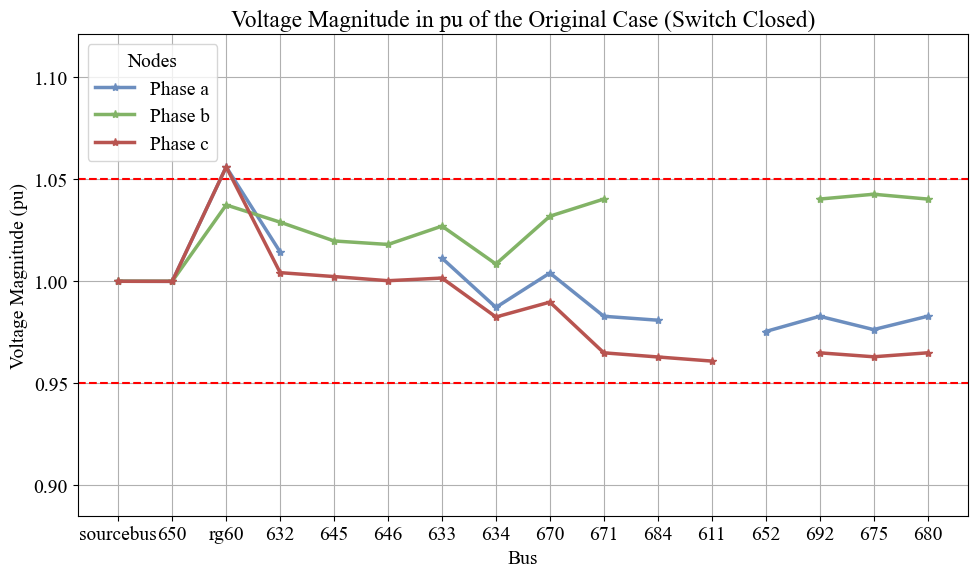

In [4]:
plot_original_3ph_closed_vpu = plot_voltage_line_dict_dict(
    original_3ph_closed_vpu, 
    title=r'Voltage Magnitude in pu of the Original Case (Switch Closed)', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.065,
    line_width=2.5
)
# save_plot(plot_original_3ph_closed_vpu, 'Original_3ph_Closed_Voltage')

#### 1.1.2. Voltage Unbalance Factor (VUF)

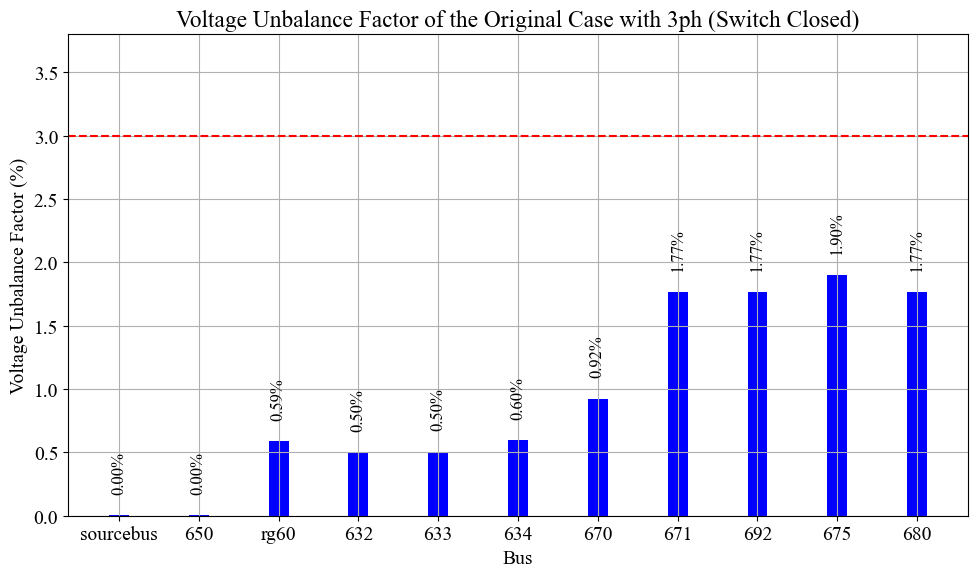

In [5]:
plot_original_3ph_closed_vuf = plot_bar_dict(
    original_3ph_closed_vuf,
    title=r'Voltage Unbalance Factor of the Original Case with 3ph (Switch Closed)',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3,
    span_text=0.2,
    fontsize_text=12
)
# save_plot(plot_original_3ph_closed_vuf, 'Original_3ph_Closed_VUF')

#### 1.1.3. Current Magnitude

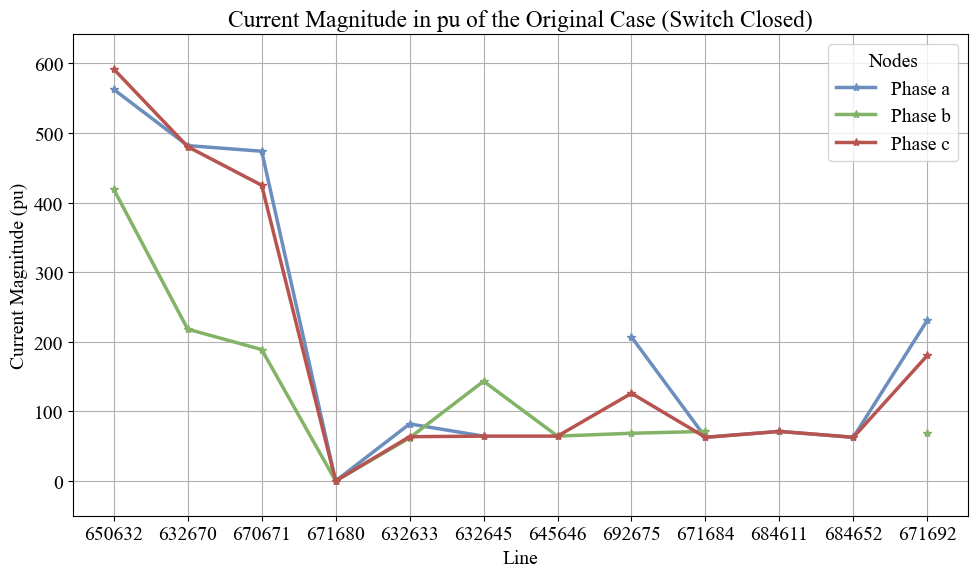

In [6]:
plot_original_3ph_closed_currents = plot_voltage_line_dict_dict(
    original_3ph_closed_currents, 
    title=r'Current Magnitude in pu of the Original Case (Switch Closed)', 
    title_x='Line', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
    line_width=2.5,
    keys_to_delete=['n']
)
# save_plot(plot_original_3ph_closed_currents, 'Original_3ph_Closed_Current')

### 1.2. Switch Opened

In [7]:
original_3ph_opened = IEEE13Nodes(path_original, open_switch=True)
original_3ph_opened.run_power_flow()
original_3ph_opened_losses = original_3ph_opened.get_losses()
print(f'The losses of the system original 3ph with the switch opened are: {original_3ph_opened_losses} [kW]')
original_3ph_opened_vpu = original_3ph_opened.get_mag_voltages_pu()
original_3ph_opened_vuf = original_3ph_opened.get_vuf_3ph()
original_3ph_opened_currents = original_3ph_opened.get_mag_currents()

The circuit has converged successfully!
The losses of the system original 3ph with the switch opened are: 57.009904681537485 [kW]


#### 1.2.1. Voltage Magnitude

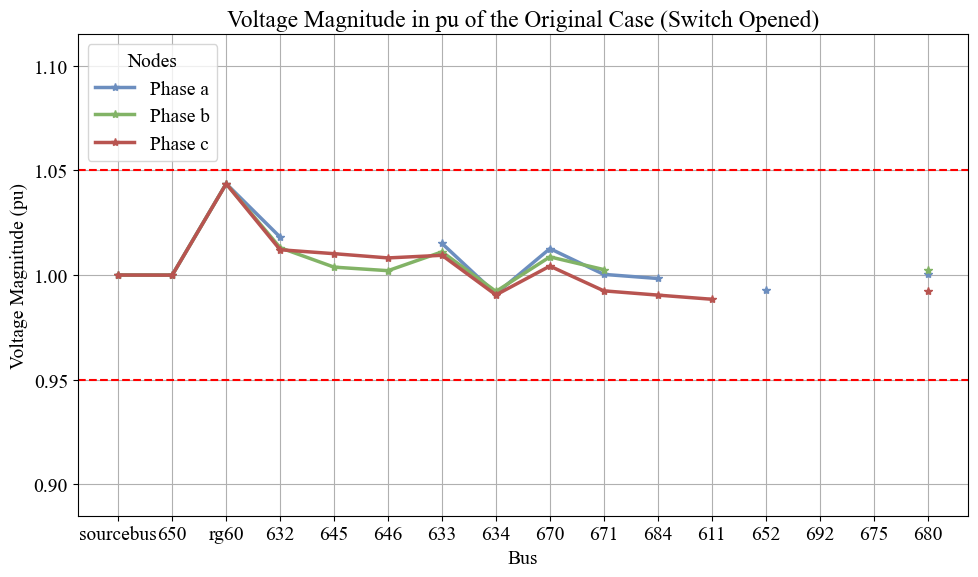

In [8]:
plot_original_3ph_opened_vpu = plot_voltage_line_dict_dict(
    original_3ph_opened_vpu, 
    title=r'Voltage Magnitude in pu of the Original Case (Switch Opened)', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.065,
    line_width=2.5
)
# save_plot(plot_original_3ph_opened_vpu, 'Original_3ph_Opened_Voltage')

#### 1.2.2. Voltage Unbalance Factor (VUF)

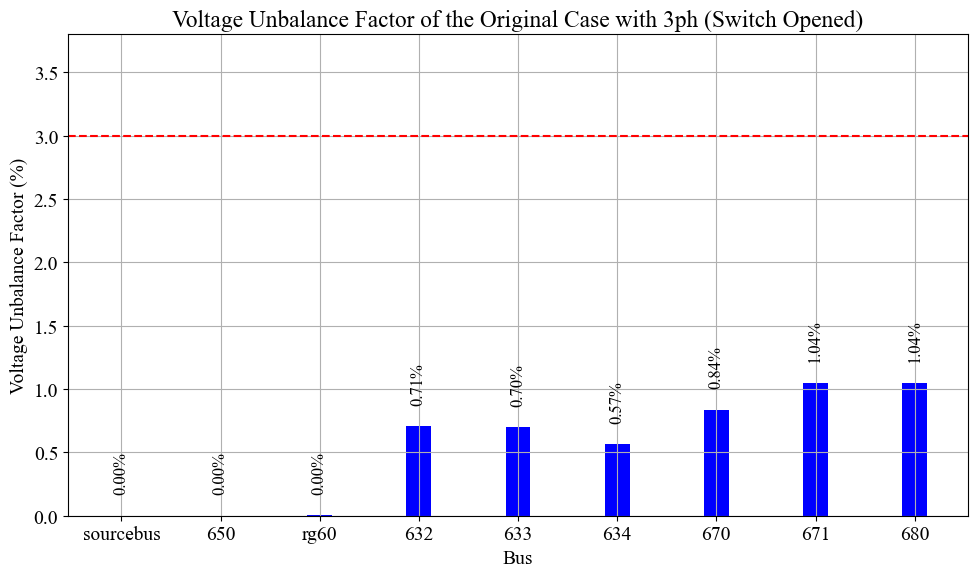

In [9]:
plot_original_3ph_opened_vuf = plot_bar_dict(
    original_3ph_opened_vuf,
    title=r'Voltage Unbalance Factor of the Original Case with 3ph (Switch Opened)',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3,
    fontsize_text=12,
    span_text=0.2
)
# save_plot(plot_original_3ph_opened_vuf, 'Original_3ph_Opened_VUF')

#### 1.2.3. Current Magnitude

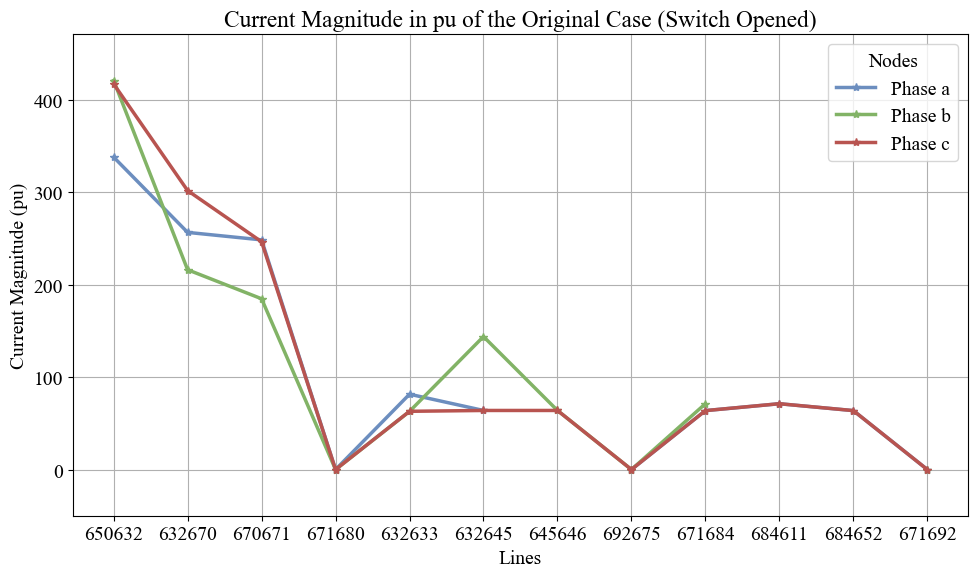

In [10]:
plot_original_3ph_opened_currents = plot_voltage_line_dict_dict(
    original_3ph_opened_currents, 
    title=r'Current Magnitude in pu of the Original Case (Switch Opened)', 
    title_x='Lines', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
    line_width=2.5,
    keys_to_delete=['n']
)
# save_plot(plot_original_3ph_opened_currents, 'Original_3ph_Opened_Current')

## 2. Modified Case with 3ph (With Kron's Reduction)

### 2.1. Switch Closed

In [11]:
modified_3ph_closed = IEEE13Nodes(path_modified)
# Doing the kron reduction
modified_3ph_closed.do_kron_reduction()
modified_3ph_closed.run_power_flow()
modified_3ph_closed_losses = modified_3ph_closed.get_losses()
print(f'The losses of the system modified 3ph with the switch closed are: {modified_3ph_closed_losses} [kW]')
modified_3ph_closed_vpu = modified_3ph_closed.get_mag_voltages_pu()
modified_3ph_closed_vuf = modified_3ph_closed.get_vuf_3ph()
modified_3ph_closed_currents = modified_3ph_closed.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 3ph with the switch closed are: 111.04523042882975 [kW]


#### 2.1.1. Voltage Magnitude

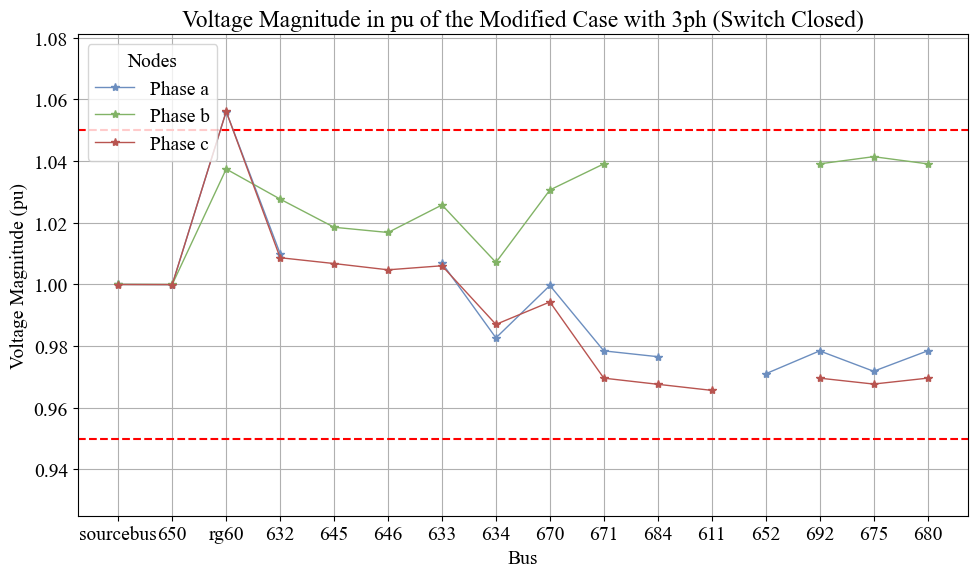

In [12]:
plot_modified_3ph_closed_vpu = plot_voltage_line_dict_dict(
    modified_3ph_closed_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 3ph (Switch Closed)', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 2.1.2. Voltage Unbalance Factor (VUF)

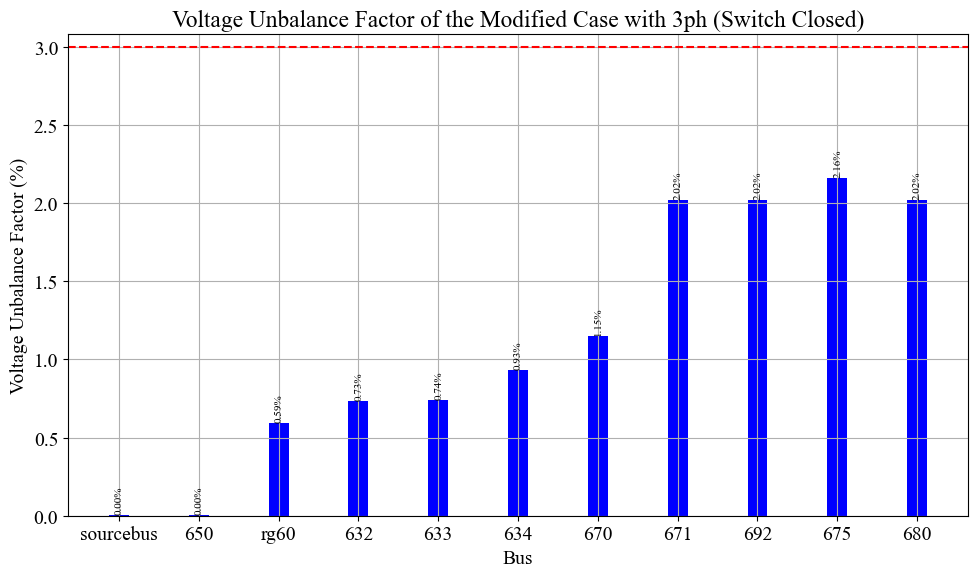

In [13]:
plot_modified_3ph_closed_vuf = plot_bar_dict(
    modified_3ph_closed_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 3ph (Switch Closed)',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 2.1.3. Current Magnitude

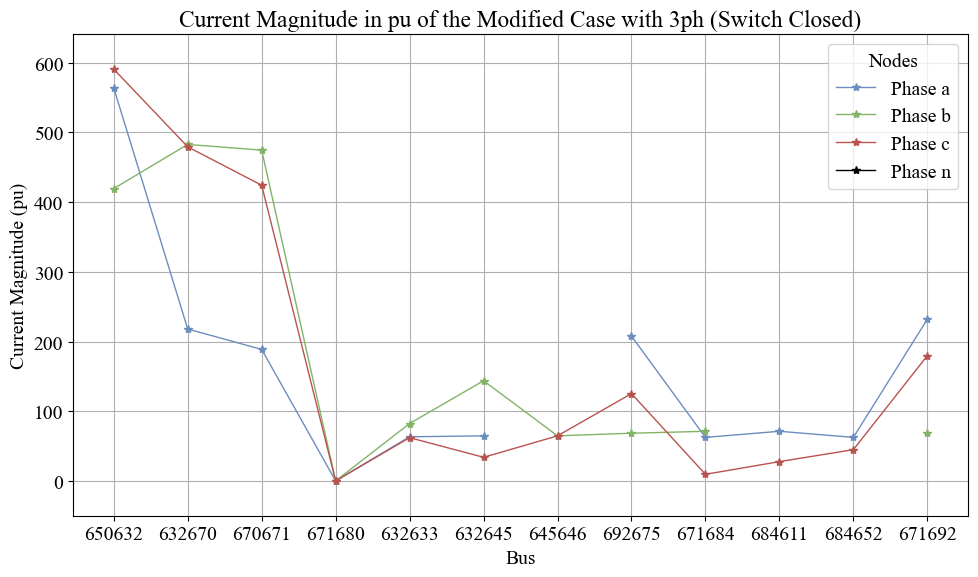

In [14]:
plot_modified_3ph_closed_currents = plot_voltage_line_dict_dict(
    modified_3ph_closed_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 3ph (Switch Closed)', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 2.2. Switch Opened

In [15]:
modified_3ph_opened = IEEE13Nodes(path_modified, open_switch=True)
# Doing the kron reduction
modified_3ph_opened.do_kron_reduction()
modified_3ph_opened.run_power_flow()
modified_3ph_opened_losses = modified_3ph_opened.get_losses()
print(f'The losses of the system modified 3ph with the switch opened are: {modified_3ph_opened_losses} [kW]')
modified_3ph_opened_vpu = modified_3ph_opened.get_mag_voltages_pu()
modified_3ph_opened_vuf = modified_3ph_opened.get_vuf_3ph()
modified_3ph_opened_currents = modified_3ph_opened.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 3ph with the switch opened are: 56.59214097505506 [kW]


#### 2.2.1. Voltage Magnitude

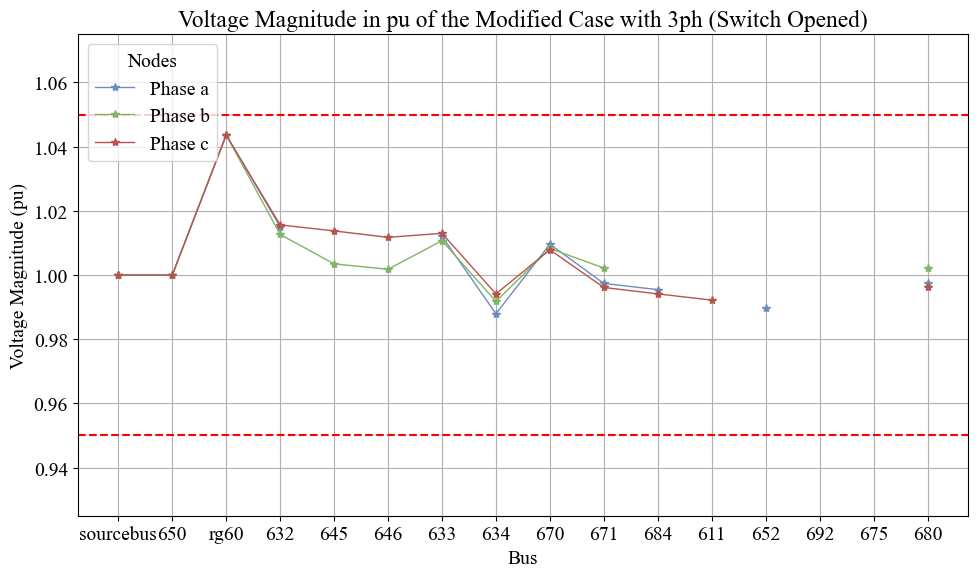

In [16]:
plot_modified_3ph_opened_vpu = plot_voltage_line_dict_dict(
    modified_3ph_opened_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 3ph (Switch Opened)', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 2.2.2. Voltage Unbalance Factor (VUF)

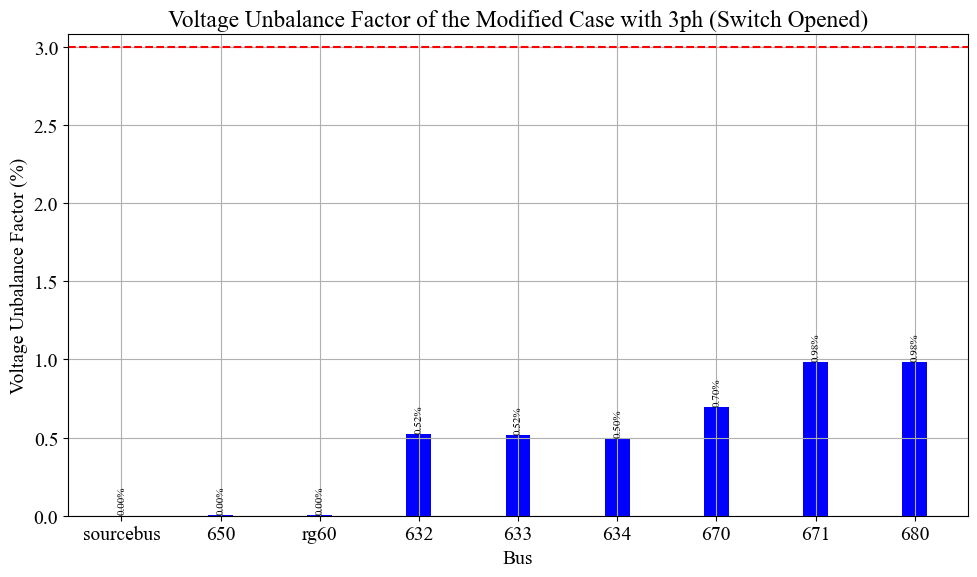

In [17]:
plot_modified_3ph_opened_vuf = plot_bar_dict(
    modified_3ph_opened_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 3ph (Switch Opened)',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 2.2.3. Current Magnitude

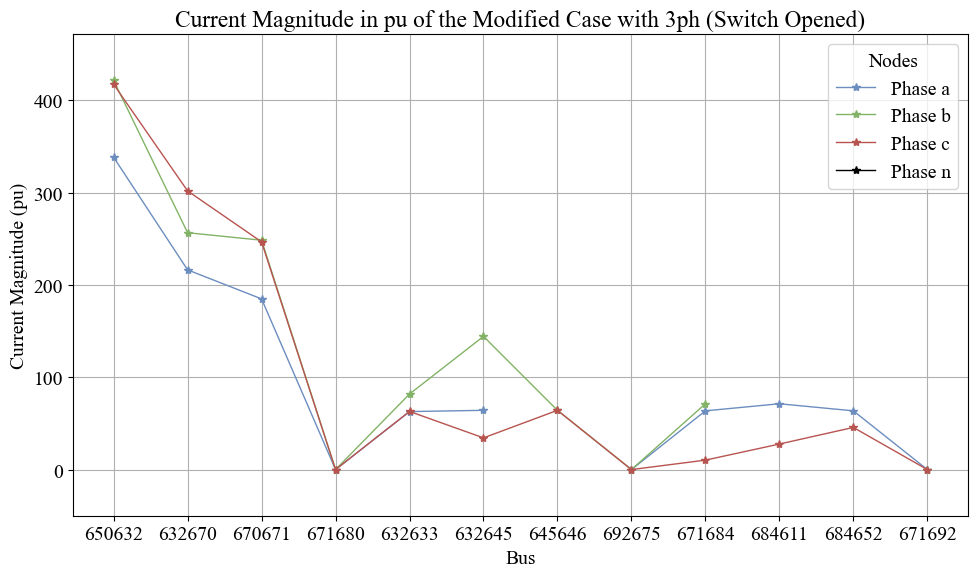

In [18]:
plot_modified_3ph_opened_currents = plot_voltage_line_dict_dict(
    modified_3ph_opened_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 3ph (Switch Opened)', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

## 3. Modified Case with 4-wire (Switch Opened)

### 3.1. Without Earthing

In [19]:
modified_4wire_opened = IEEE13Nodes(path_modified, open_switch=True)
modified_4wire_opened.run_power_flow()
modified_4wire_opened_losses = modified_4wire_opened.get_losses()
print(f'The losses of the system modified 4wire with the switch opened are: {modified_4wire_opened_losses} [kW]')
modified_4wire_opened_vpu = modified_4wire_opened.get_mag_voltages_pu()
modified_4wire_opened_vol = modified_4wire_opened.get_mag_voltages()
modified_4wire_opened_vuf = modified_4wire_opened.get_vuf_3ph()
modified_4wire_opened_currents = modified_4wire_opened.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with the switch opened are: 59.102841794378044 [kW]


#### 3.1.1. Voltage Magnitude

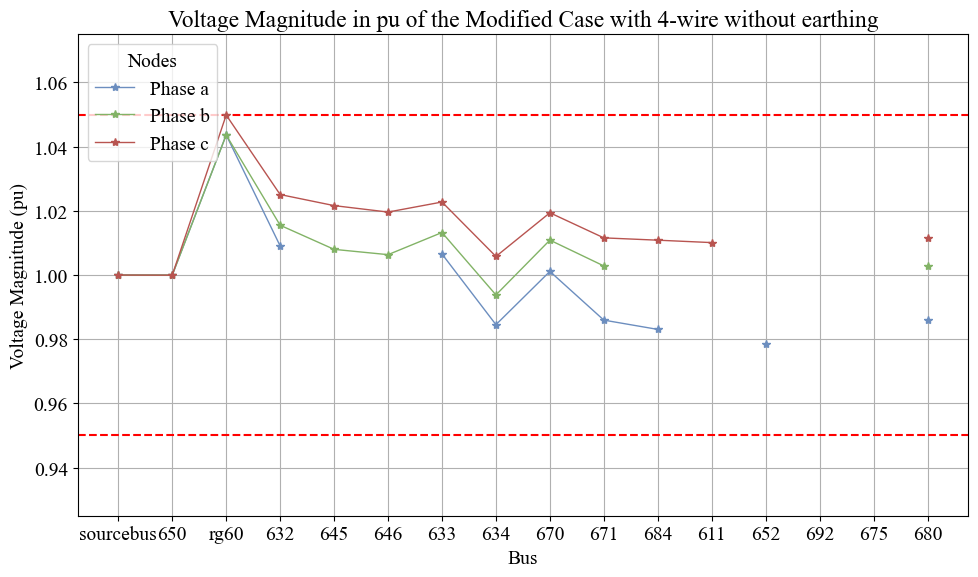

In [20]:
plot_modified_4_wire_opened_vpu = plot_voltage_line_dict_dict(
    modified_4wire_opened_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire without earthing', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.1.2. Voltage Unbalance Factor (VUF)

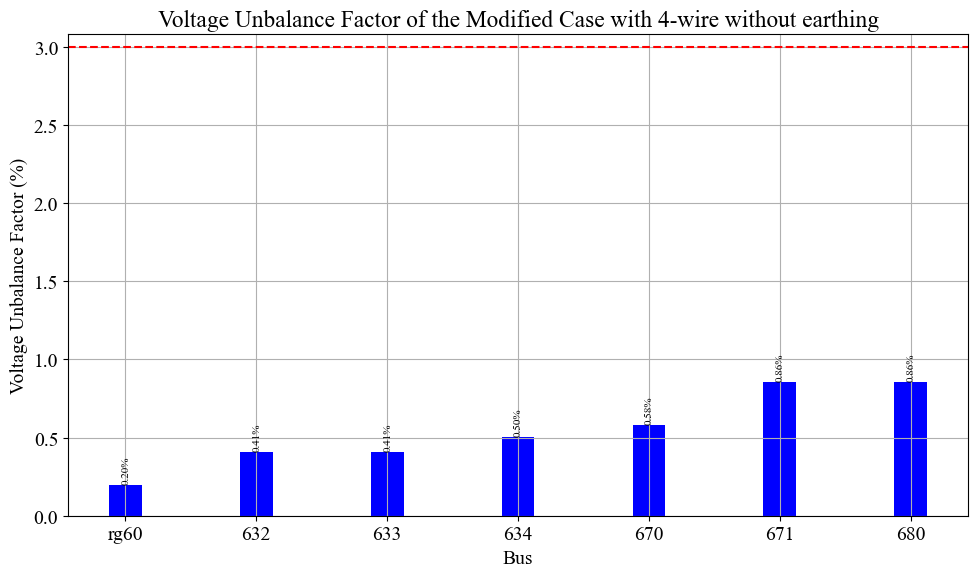

In [21]:
plot_modified_4wire_opened_vuf = plot_bar_dict(
    modified_4wire_opened_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4-wire without earthing',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.1.3. Current Magnitude

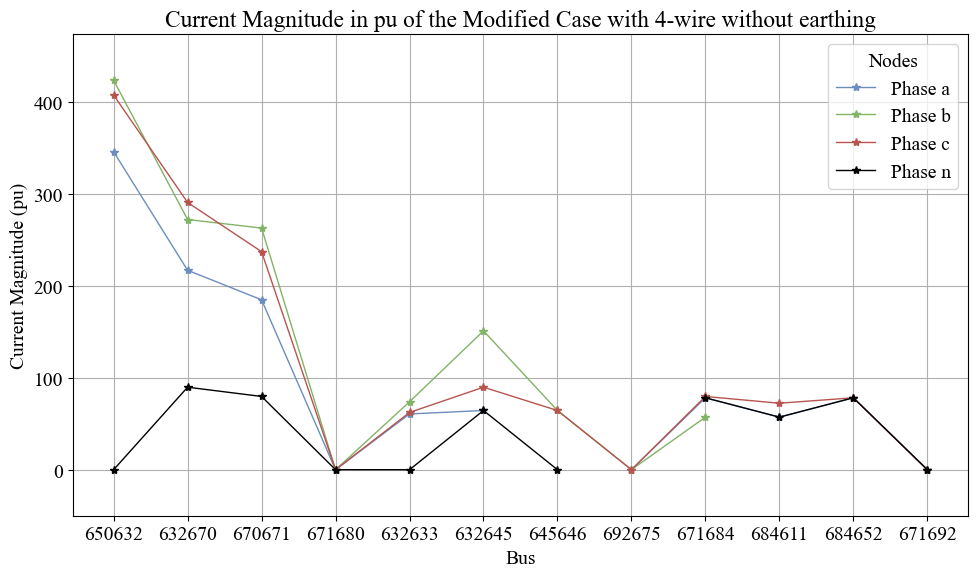

In [22]:
plot_modified_4wire_opened_currents = plot_voltage_line_dict_dict(
    modified_4wire_opened_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4-wire without earthing', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 3.2. With Earthing $R_G = 0 \Omega$

In [23]:
modified_4wire_rg0 = IEEE13Nodes(path_modified, open_switch=True, earth_model='carson')
modified_4wire_rg0.add_reactors(z_g=0.000000001 + 0j)
modified_4wire_rg0.run_power_flow()
modified_4wire_rg0_losses = modified_4wire_rg0.get_losses()
print(f'The losses of the system modified 4wire with resistance to ground near to 0 are: {modified_4wire_rg0_losses} [kW]')
modified_4wire_rg0_vpu = modified_4wire_rg0.get_mag_voltages_pu()
modified_4wire_rg0_vol = modified_4wire_rg0.get_mag_voltages()
modified_4wire_rg0_vuf = modified_4wire_rg0.get_vuf_3ph()
modified_4wire_rg0_currents = modified_4wire_rg0.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with resistance to ground near to 0 are: 56.59245646225949 [kW]


#### 3.2.1. Voltage Magnitude

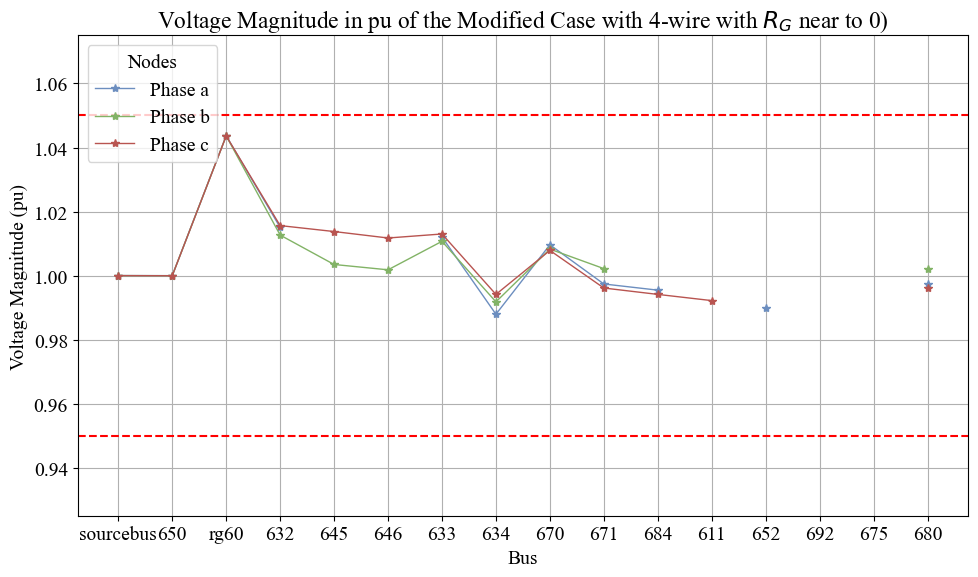

In [24]:
plot_modified_4wire_rg0_vpu = plot_voltage_line_dict_dict(
    modified_4wire_rg0_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire with $R_G$ near to 0)', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.2.2. Voltage Unbalance Factor (VUF)

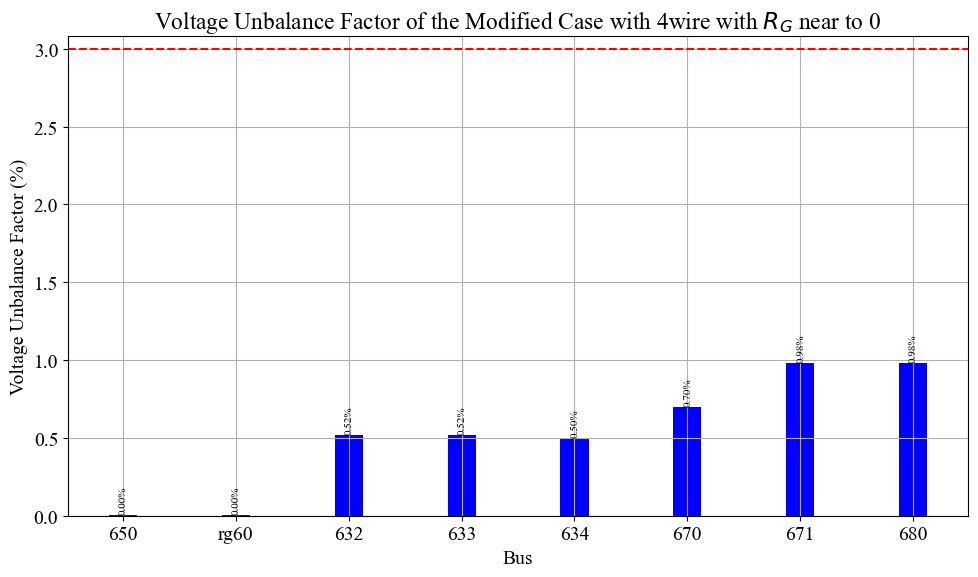

In [25]:
plot_modified_4wire_rg0_vuf = plot_bar_dict(
    modified_4wire_rg0_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4wire with $R_G$ near to 0',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.2.3. Current Magnitude

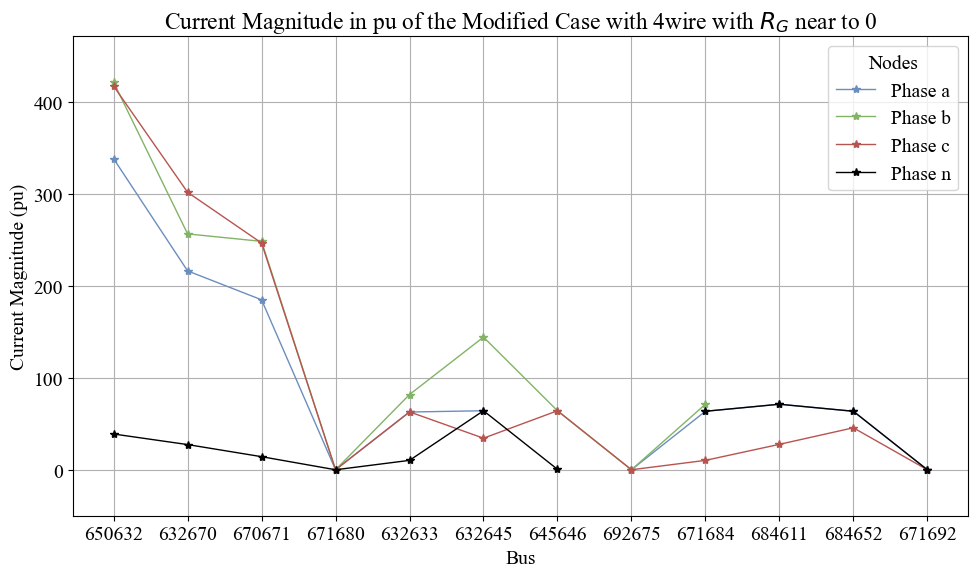

In [26]:
plot_modified_4wire_rg0_currents = plot_voltage_line_dict_dict(
    modified_4wire_rg0_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4wire with $R_G$ near to 0', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 3.3. With Earthing $R_G = 1 \Omega$

In [27]:
modified_4wire_rg1 = IEEE13Nodes(path_modified, open_switch=True, earth_model='carson')
modified_4wire_rg1.add_reactors(z_g=1 + 0j)
modified_4wire_rg1.run_power_flow()
modified_4wire_rg1_losses = modified_4wire_rg1.get_losses()
print(f'The losses of the system modified 4wire with resistance to ground of 1 ohm are: {modified_4wire_rg1_losses} [kW]')
modified_4wire_rg1_vpu = modified_4wire_rg1.get_mag_voltages_pu()
modified_4wire_rg1_vol = modified_4wire_rg1.get_mag_voltages()
modified_4wire_rg1_vuf = modified_4wire_rg1.get_vuf_3ph()
modified_4wire_rg1_currents = modified_4wire_rg1.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with resistance to ground of 1 ohm are: 57.684267723470136 [kW]


#### 3.3.1. Voltage Magnitude

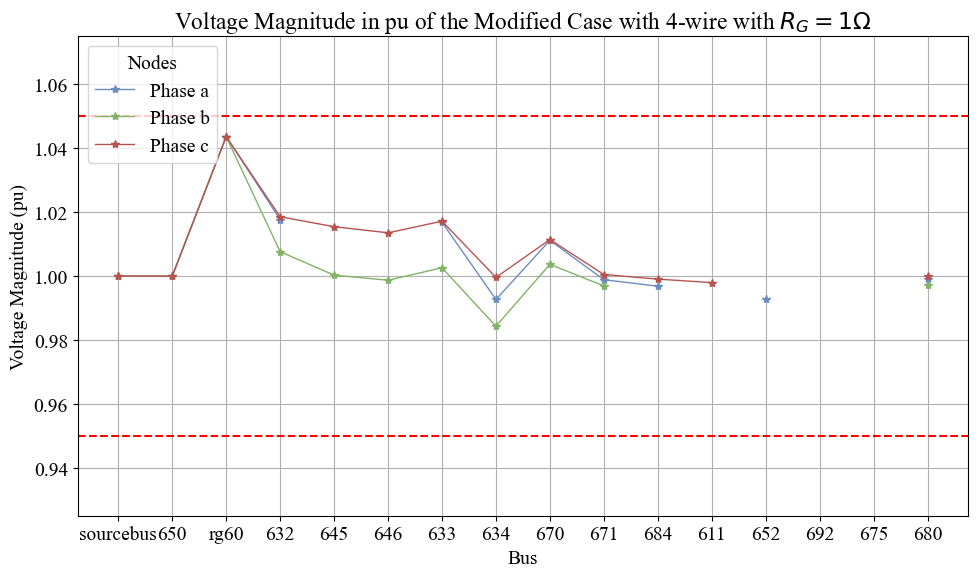

In [28]:
plot_modified_4wire_rg1_vpu = plot_voltage_line_dict_dict(
    modified_4wire_rg1_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire with $R_G = 1\Omega$', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.3.2. Voltage Unbalance Factor (VUF)

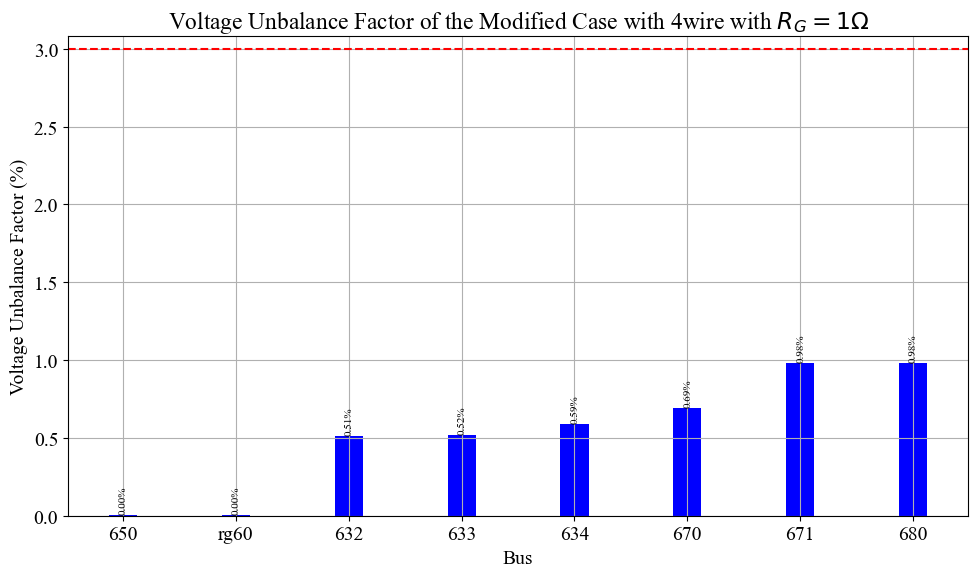

In [29]:
plot_modified_4wire_rg1_vuf = plot_bar_dict(
    modified_4wire_rg1_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4wire with $R_G = 1\Omega$',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.3.3. Current Magnitude

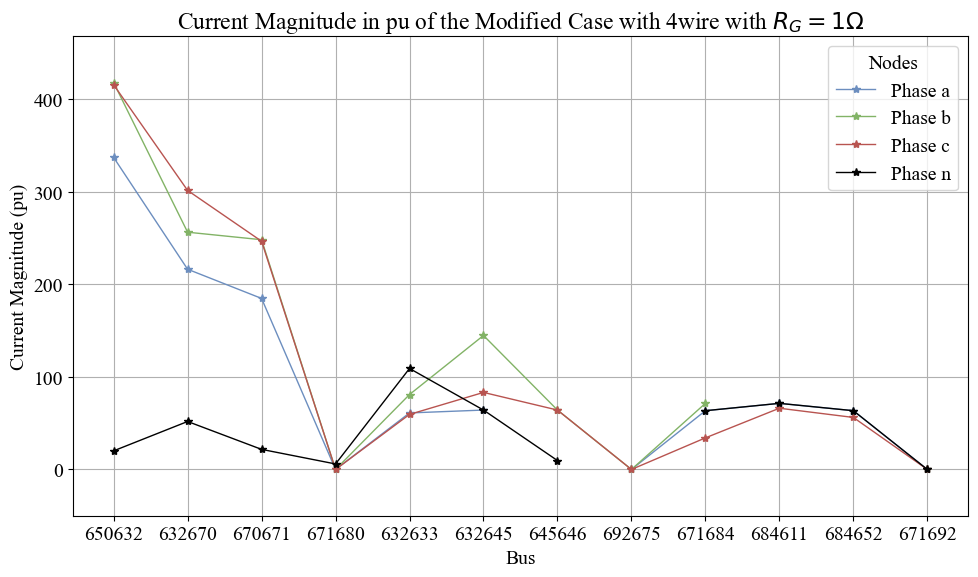

In [30]:
plot_modified_4wire_rg1_currents = plot_voltage_line_dict_dict(
    modified_4wire_rg1_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4wire with $R_G = 1\Omega$', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 3.4. With Earthing $R_G = 5 \Omega$

In [31]:
modified_4wire_rg5 = IEEE13Nodes(path_modified, open_switch=True, earth_model='carson')
modified_4wire_rg5.add_reactors(z_g=5 + 0j)
modified_4wire_rg5.run_power_flow()
modified_4wire_rg5_losses = modified_4wire_rg5.get_losses()
print(f'The losses of the system modified 4wire with resistance to ground of 5 ohms are: {modified_4wire_rg5_losses} [kW]')
modified_4wire_rg5_vpu = modified_4wire_rg5.get_mag_voltages_pu()
modified_4wire_rg5_vol = modified_4wire_rg5.get_mag_voltages()
modified_4wire_rg5_vuf = modified_4wire_rg5.get_vuf_3ph()
modified_4wire_rg5_currents = modified_4wire_rg5.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with resistance to ground of 5 ohms are: 57.58034811460515 [kW]


#### 3.4.1. Voltage Magnitude

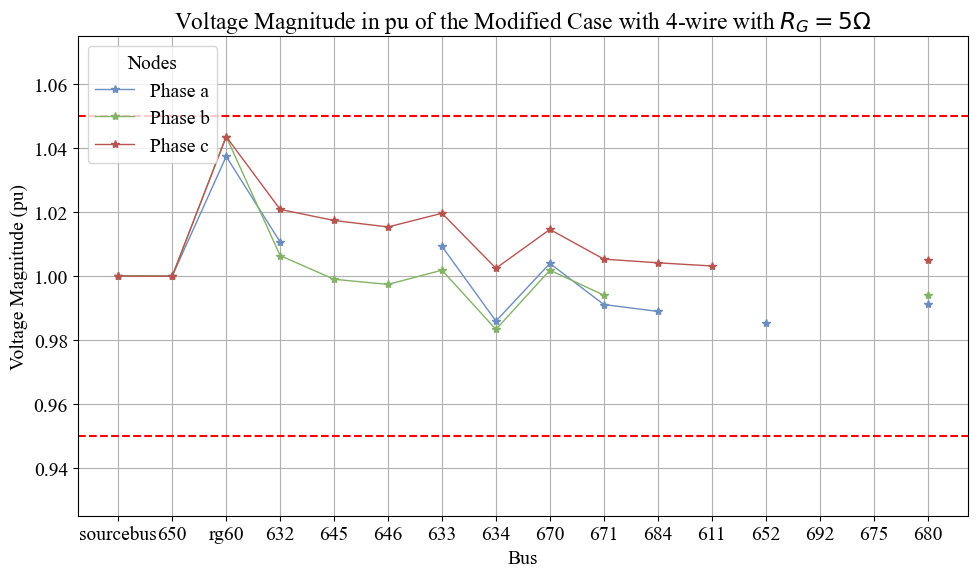

In [32]:
plot_modified_4wire_rg5_vpu = plot_voltage_line_dict_dict(
    modified_4wire_rg5_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire with $R_G = 5\Omega$', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.4.2. Voltage Unbalance Factor (VUF)

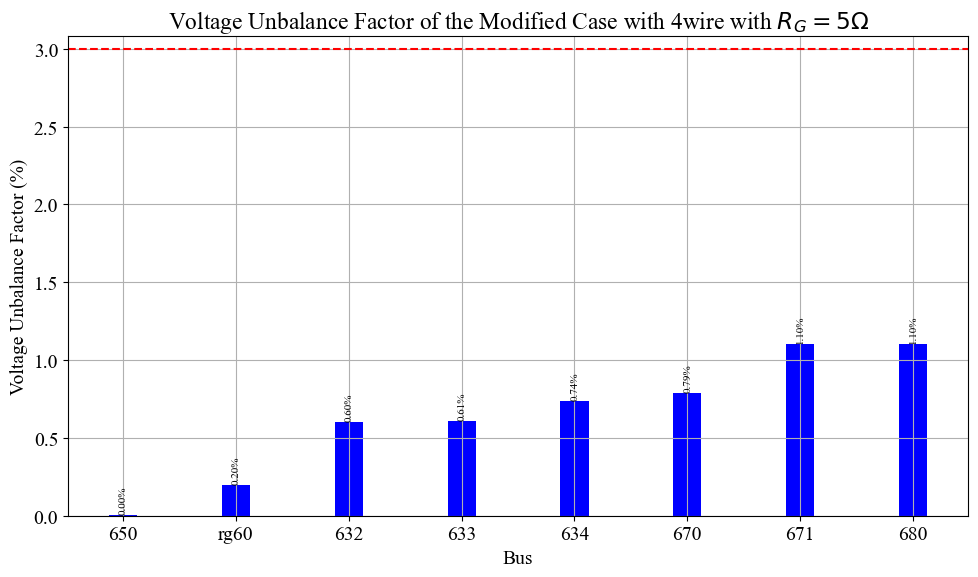

In [33]:
plot_modified_4wire_rg5_vuf = plot_bar_dict(
    modified_4wire_rg5_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4wire with $R_G = 5\Omega$',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.4.3. Current Magnitude

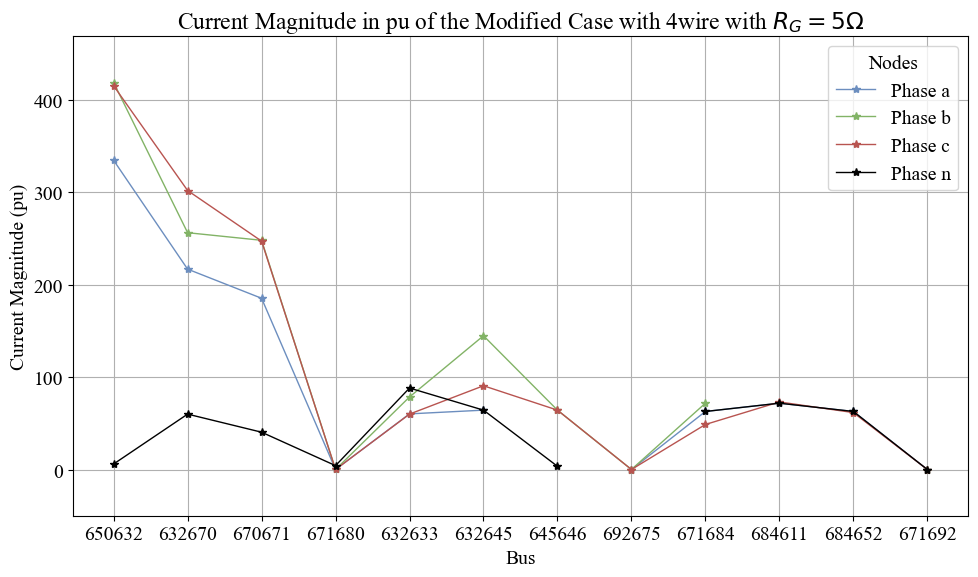

In [34]:
plot_modified_4wire_rg5_currents = plot_voltage_line_dict_dict(
    modified_4wire_rg5_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4wire with $R_G = 5\Omega$', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 3.5. With Earthing $R_G = 25 \Omega$

In [35]:
modified_4wire_rg25 = IEEE13Nodes(path_modified, open_switch=True, earth_model='carson')
modified_4wire_rg25.add_reactors(z_g=25 + 0j)
modified_4wire_rg25.run_power_flow()
modified_4wire_rg25_losses = modified_4wire_rg25.get_losses()
print(f'The losses of the system modified 4wire with resistance to ground of 25 ohms are: {modified_4wire_rg25_losses} [kW]')
modified_4wire_rg25_vpu = modified_4wire_rg25.get_mag_voltages_pu()
modified_4wire_rg25_vol = modified_4wire_rg25.get_mag_voltages()
modified_4wire_rg25_vuf = modified_4wire_rg25.get_vuf_3ph()
modified_4wire_rg25_currents = modified_4wire_rg25.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with resistance to ground of 25 ohms are: 57.899883158646674 [kW]


#### 3.5.1. Voltage Magnitude

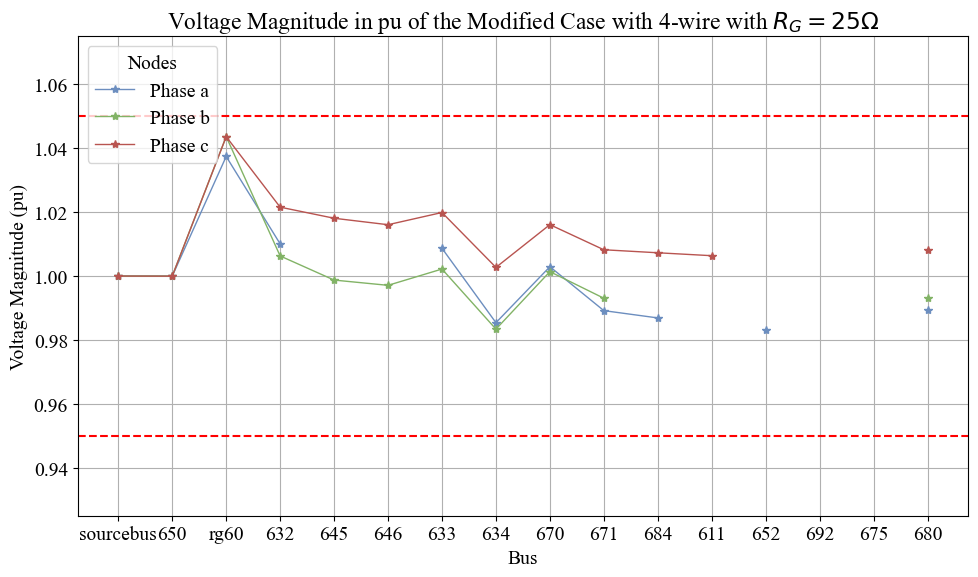

In [36]:
plot_modified_4wire_rg25_vpu = plot_voltage_line_dict_dict(
    modified_4wire_rg25_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire with $R_G = 25\Omega$', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.5.2. Voltage Unbalance Factor (VUF)

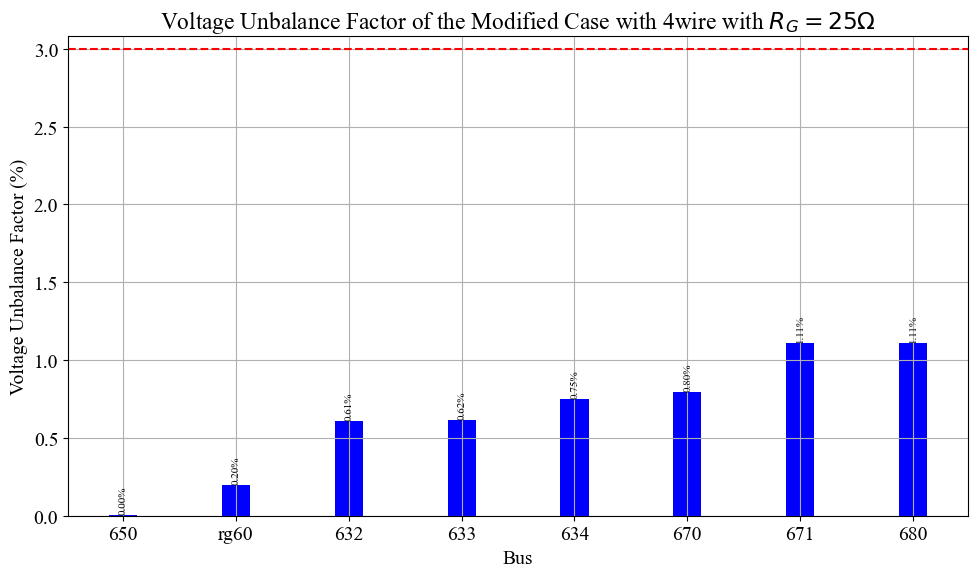

In [37]:
plot_modified_4wire_rg25_vuf = plot_bar_dict(
    modified_4wire_rg25_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4wire with $R_G = 25\Omega$',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.5.3. Current Magnitude

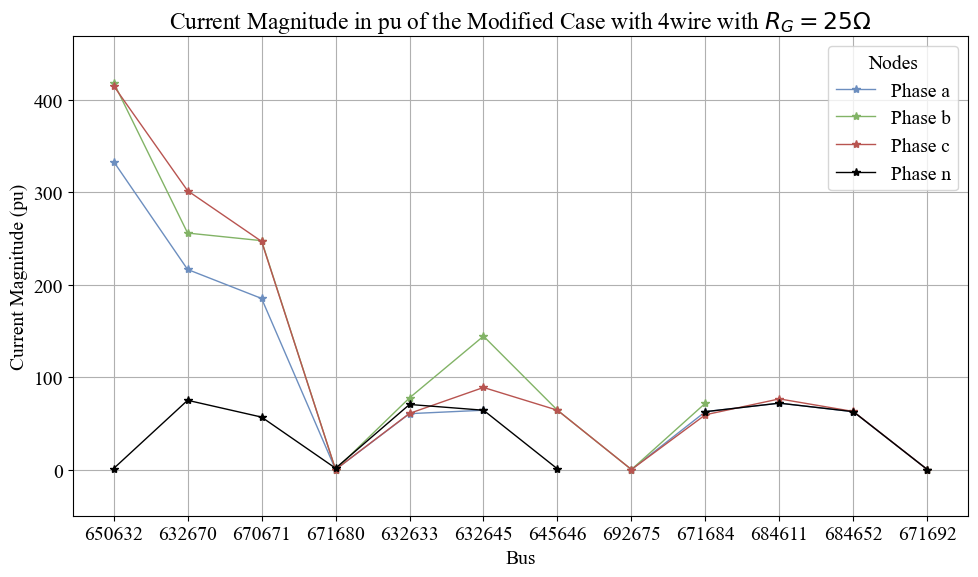

In [38]:
plot_modified_4wire_rg25_currents = plot_voltage_line_dict_dict(
    modified_4wire_rg25_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4wire with $R_G = 25\Omega$', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

### 3.6. With Earthing $R_G = 100 \Omega$

In [39]:
modified_4wire_rg100 = IEEE13Nodes(path_modified, open_switch=True, earth_model='carson')
modified_4wire_rg100.add_reactors(z_g=100 + 0j)
modified_4wire_rg100.run_power_flow()
modified_4wire_rg100_losses = modified_4wire_rg100.get_losses()
print(f'The losses of the system modified 4wire with resistance to ground of 100 ohms are: {modified_4wire_rg100_losses} [kW]')
modified_4wire_rg100_vpu = modified_4wire_rg100.get_mag_voltages_pu()
modified_4wire_rg100_vol = modified_4wire_rg100.get_mag_voltages()
modified_4wire_rg100_vuf = modified_4wire_rg100.get_vuf_3ph()
modified_4wire_rg100_currents = modified_4wire_rg100.get_mag_currents()

The circuit has converged successfully!
The losses of the system modified 4wire with resistance to ground of 100 ohms are: 58.18116315752292 [kW]


#### 3.6.1. Voltage Magnitude

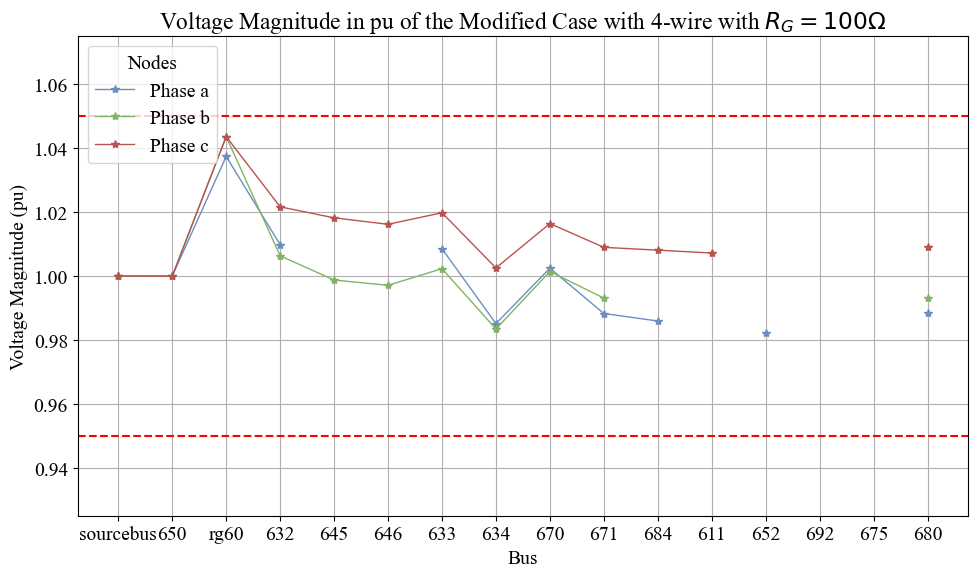

In [40]:
plot_modified_4wire_rg100_vpu = plot_voltage_line_dict_dict(
    modified_4wire_rg100_vpu, 
    title=r'Voltage Magnitude in pu of the Modified Case with 4-wire with $R_G = 100\Omega$', 
    title_x='Bus', 
    title_y='Voltage Magnitude (pu)', 
    title_legend='Nodes', 
    keys_to_delete=['n'],
    delete_zeros=True,
    limit_top=1.05,
    limit_bottom=0.95,
    span_plot=0.025,
)

#### 3.6.2. Voltage Unbalance Factor (VUF)

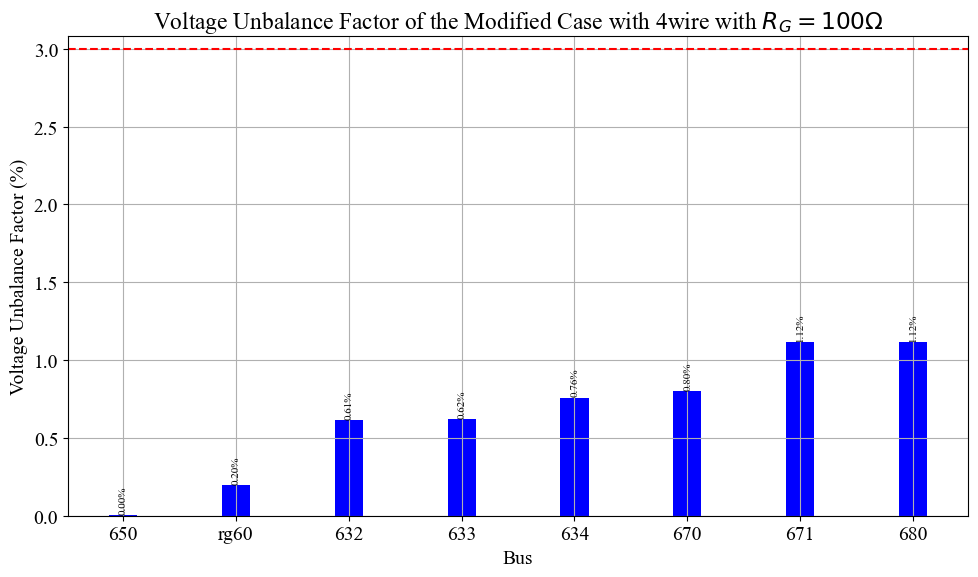

In [41]:
plot_modified_4wire_rg100_vuf = plot_bar_dict(
    modified_4wire_rg100_vuf,
    title=r'Voltage Unbalance Factor of the Modified Case with 4wire with $R_G = 100\Omega$',
    title_x='Bus',
    title_y='Voltage Unbalance Factor (%)',
    is_percentage=True,
    horizontal_limit=3
)

#### 3.6.3. Current Magnitude

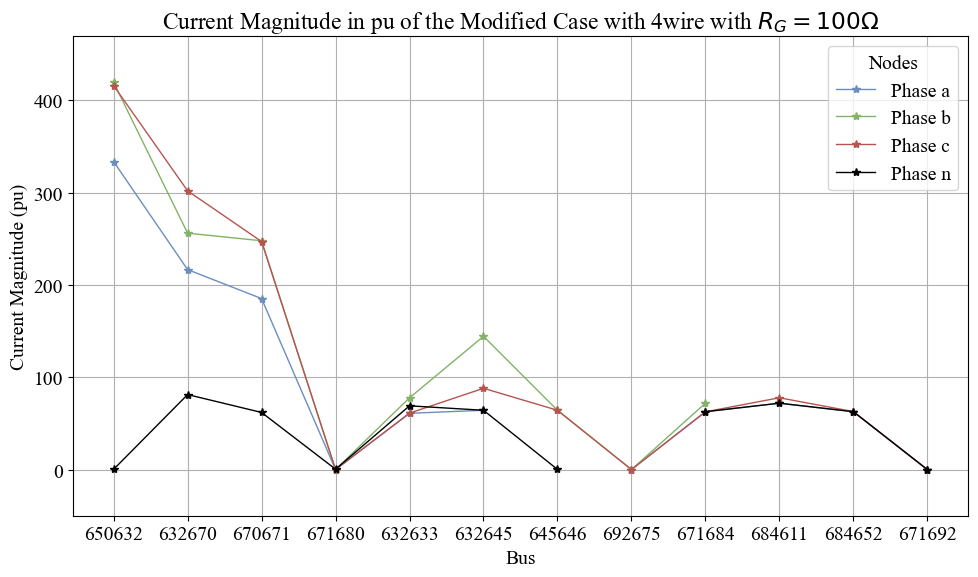

In [42]:
plot_modified_4wire_rg100_currents = plot_voltage_line_dict_dict(
    modified_4wire_rg100_currents, 
    title=r'Current Magnitude in pu of the Modified Case with 4wire with $R_G = 100\Omega$', 
    title_x='Bus', 
    title_y='Current Magnitude (pu)', 
    title_legend='Nodes', 
    span_plot=50,
    loc_legend='upper right',
)

## 4. Comparison Analysis

### 4.1. Comparison of NEV with different $R_G$

In [43]:
def merge_results_nev_by_dict(dictionaries: list, names: list):
    results_merged = {}
    for dictionary in dictionaries:
        for key, values in dictionary.items():
            if key not in results_merged:
                results_merged[key] = {}
            if 'n' in list(values.keys()):
                results_merged[key][names[dictionaries.index(dictionary)]] = values['n']
            else:
                results_merged[key][names[dictionaries.index(dictionary)]] = np.nan
            
    return results_merged
            

dict_to_compare = [modified_4wire_rg0_vol, modified_4wire_rg1_vol, modified_4wire_rg5_vol, modified_4wire_rg25_vol, modified_4wire_rg100_vol]

names_for_keys = ['0', '1', '5', '25', '100']

result_merged = merge_results_nev_by_dict(dict_to_compare, names_for_keys)
del result_merged['sourcebus']

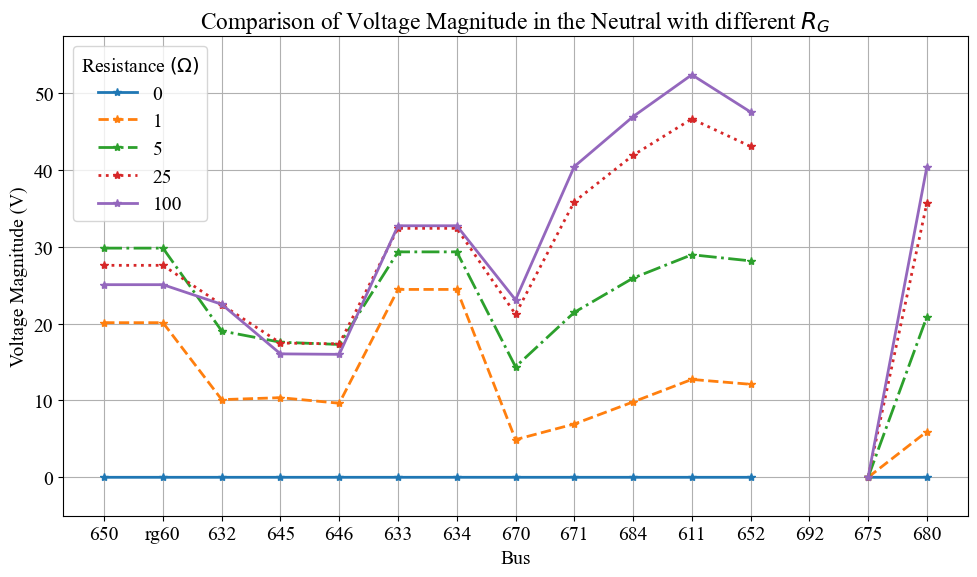

In [44]:
# Plotting the voltage magnitude in the neutral for the modified case 4wire without earthing
plot_modified_4wire_opened_nev = plot_line_dict_dict(
    data = result_merged,
    title = r'Comparison of Voltage Magnitude in the Neutral with different $R_G$',
    title_x = 'Bus',
    title_y = 'Voltage Magnitude (V)',
    title_legend = r'Resistance $(\Omega)$',
    span_plot = 5,
    linestyle=['-', '--', '-.', ':', '-'],
    line_width=2,
    loc_legend='upper left'
)
# save_plot(plot_modified_4wire_opened_nev, 'Comparison_NEV_by_RG')

### 4.2. Comparison between 3ph cases

#### 4.2.1. Switch Closed

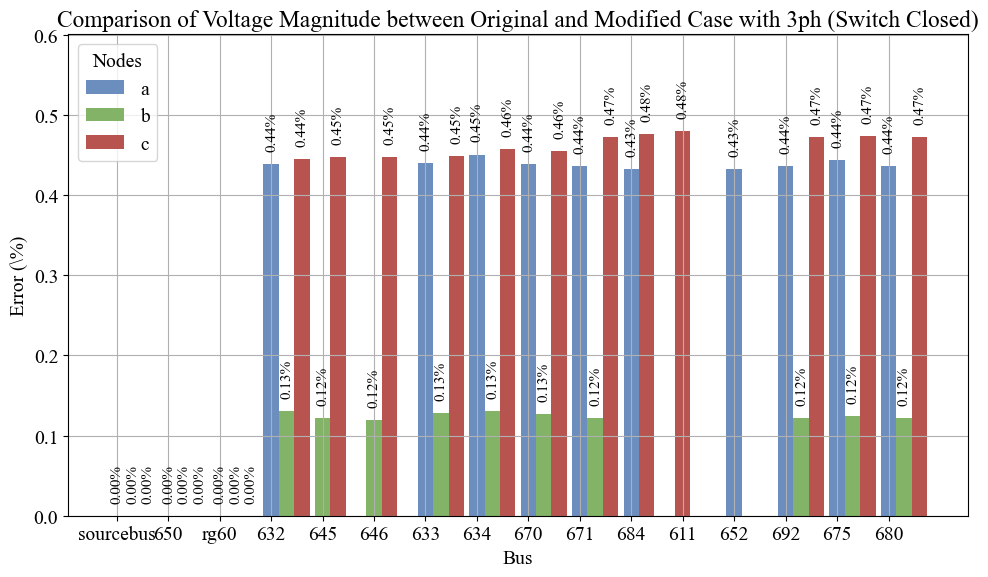

In [45]:
# Get the dictionary of errors
comparison_3ph_closed = get_error_between_two_dict(original_3ph_closed_vpu, modified_3ph_closed_vpu)
plot_comparison_3ph_closed = plot_bar_dict_dict(
    comparison_3ph_closed,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case with 3ph (Switch Closed)',
    title_y=r'Error (\%)',
    title_x='Bus',
    title_legend='Nodes',
    is_percentage=True,
    fontsize_text=11,
    bar_width=0.3
)
# save_plot(plot_comparison_3ph_closed, 'Comparison_3ph_Closed')

#### 4.2.2. Switch Opened

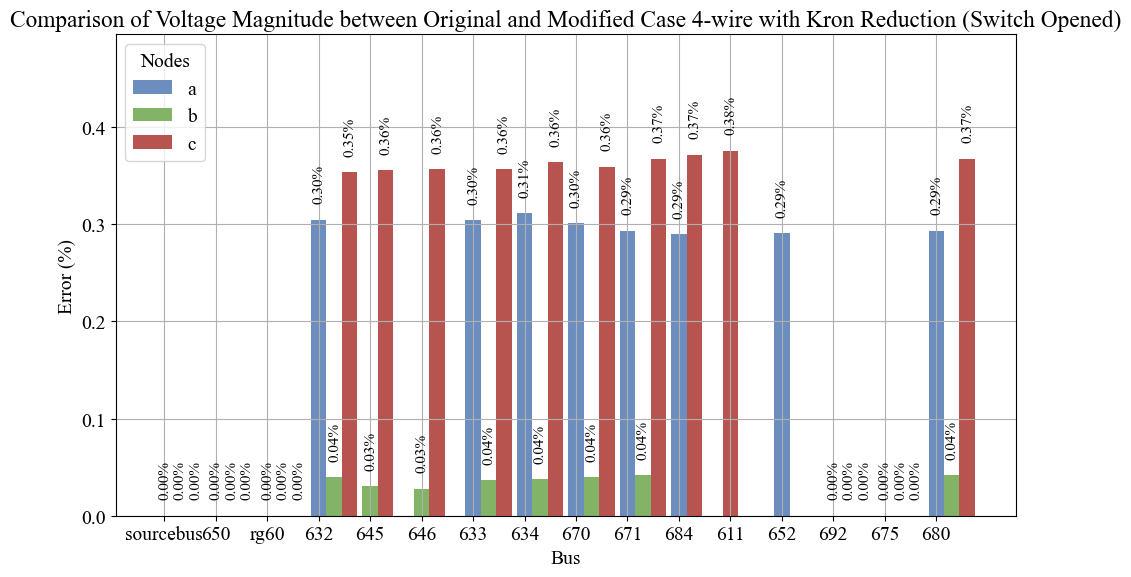

In [46]:
# Get the dictionary of errors
comparison_3ph_opened = get_error_between_two_dict(original_3ph_opened_vpu, modified_3ph_opened_vpu)
plot_comparison_3ph_opened = plot_bar_dict_dict(
    comparison_3ph_opened,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with Kron Reduction (Switch Opened)',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    is_percentage=True,
    fontsize_text=11,
    bar_width=0.3
)
# save_plot(plot_comparison_3ph_opened, 'Comparison_3ph_Opened')

### 4.3. Comparison between 4-wire cases and original case

#### 4.3.1. Without Earthing

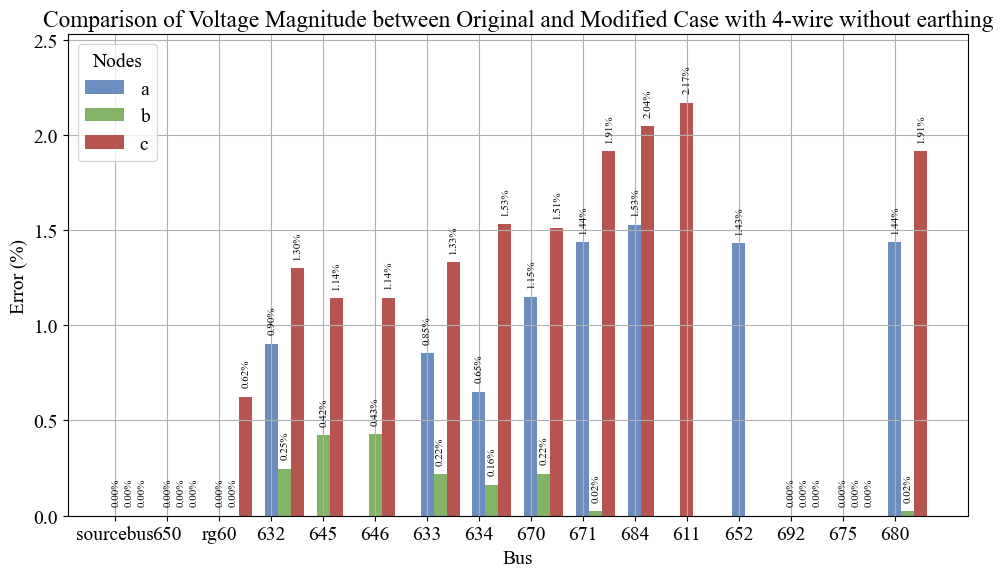

In [47]:
# Get the dictionary of errors
comparison_4wire_opened = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_opened_vpu)
plot_comparison_4wire_opened = plot_bar_dict_dict(
    comparison_4wire_opened,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case with 4-wire without earthing',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    is_percentage=True,
    span_text=0.06
)

#### 4.3.2. With Earthing $R_G = 0 \Omega$

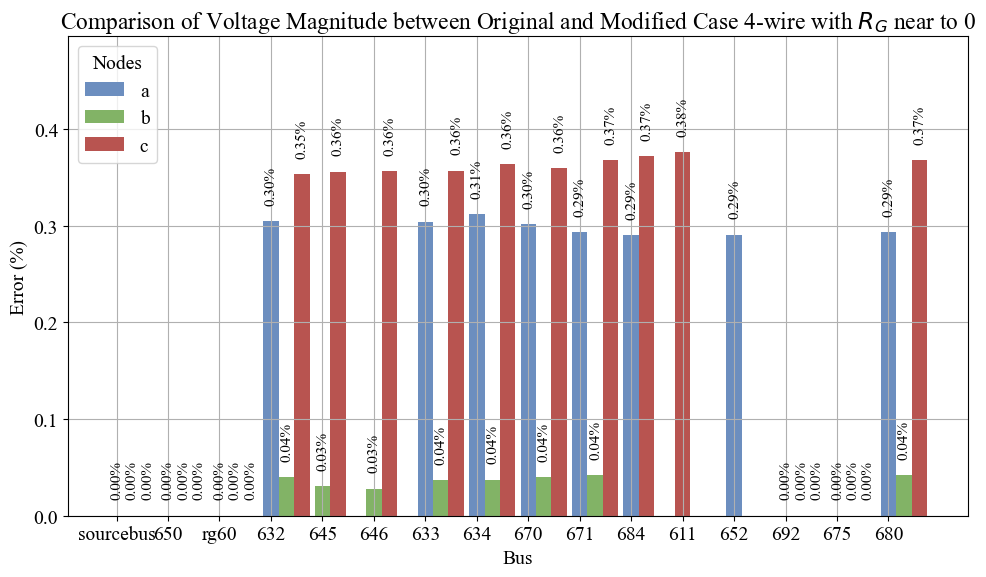

In [48]:
# Get the dictionary of errors
comparison_4wire_rg0 = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_rg0_vpu)
plot_comparison_4wire_rg0 = plot_bar_dict_dict(
    comparison_4wire_rg0,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with $R_G$ near to 0',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    is_percentage=True,
    fontsize_text=11,
    bar_width=0.3
)
# save_plot(plot_comparison_4wire_rg0, 'Comparison_4wire_RG0')

#### 4.3.3. With Earthing $R_G = 1 \Omega$

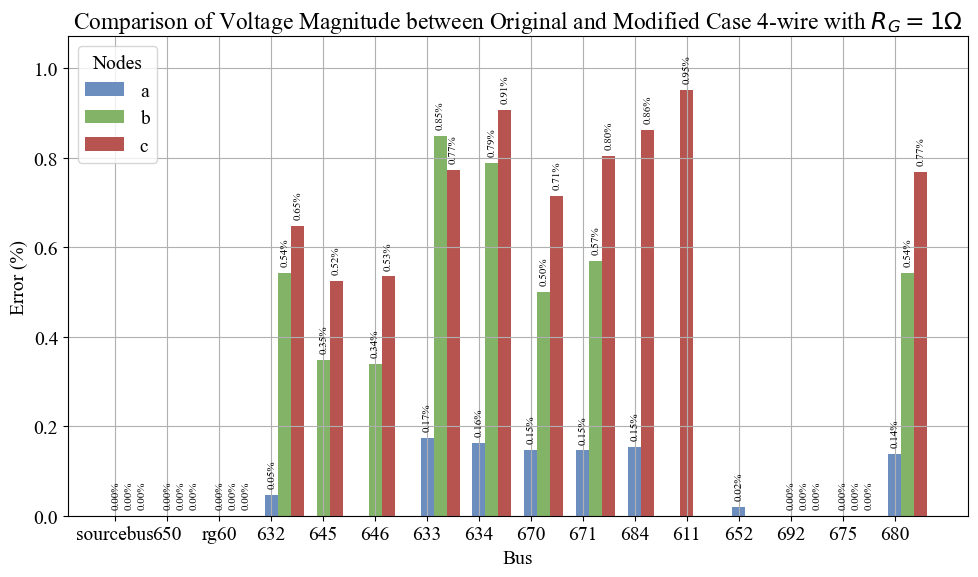

In [49]:
# Get the dictionary of errors
comparison_4wire_rg1 = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_rg1_vpu)
plot_comparison_4wire_rg1 = plot_bar_dict_dict(
    comparison_4wire_rg1,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with $R_G = 1\Omega$',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    is_percentage=True
)

#### 4.3.4. With Earthing $R_G = 5 \Omega$

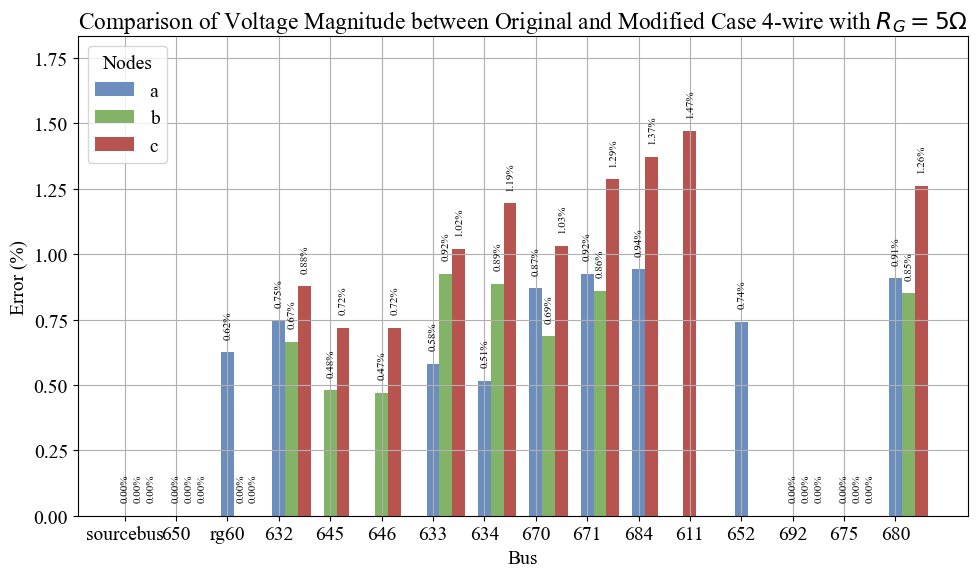

In [50]:
# Get the dictionary of errors
comparison_4wire_rg5 = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_rg5_vpu)
plot_comparison_4wire_rg5 = plot_bar_dict_dict(
    comparison_4wire_rg5,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with $R_G = 5\Omega$',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    span_text=0.06,
    is_percentage=True
)

#### 4.3.5. With Earthing $R_G = 25 \Omega$

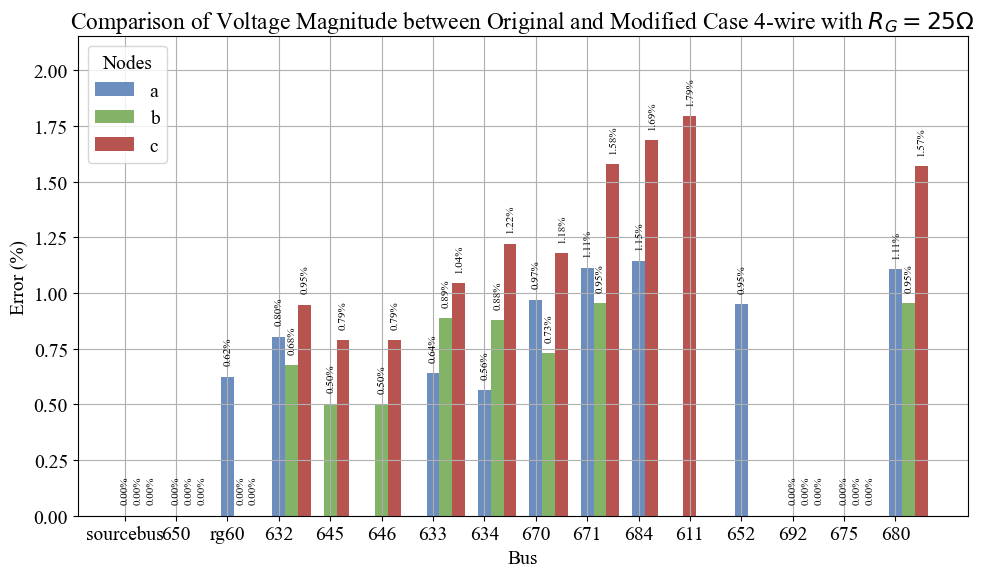

In [51]:
# Get the dictionary of errors
comparison_4wire_rg25 = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_rg25_vpu)
plot_comparison_4wire_rg25 = plot_bar_dict_dict(
    comparison_4wire_rg25,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with $R_G = 25\Omega$',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    span_text=0.06,
    is_percentage=True
)

#### 4.3.6. With Earthing $R_G = 100 \Omega$

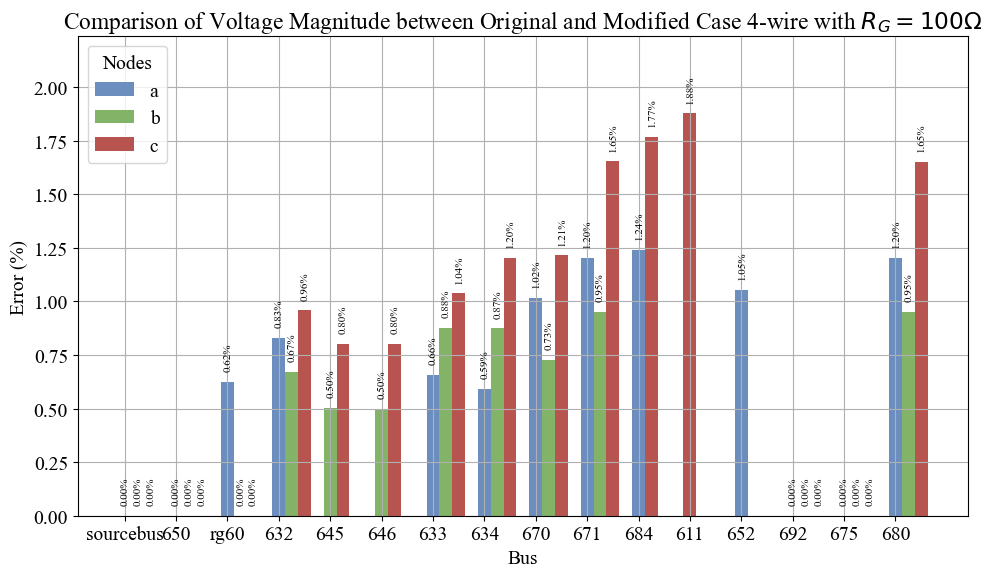

In [52]:
# Get the dictionary of errors
comparison_4wire_rg100 = get_error_between_two_dict(original_3ph_opened_vpu, modified_4wire_rg100_vpu)
plot_comparison_4wire_rg100 = plot_bar_dict_dict(
    comparison_4wire_rg100,
    title=r'Comparison of Voltage Magnitude between Original and Modified Case 4-wire with $R_G = 100\Omega$',
    title_y='Error (%)',
    title_x='Bus',
    title_legend='Nodes',
    span_text=0.06,
    is_percentage=True
)